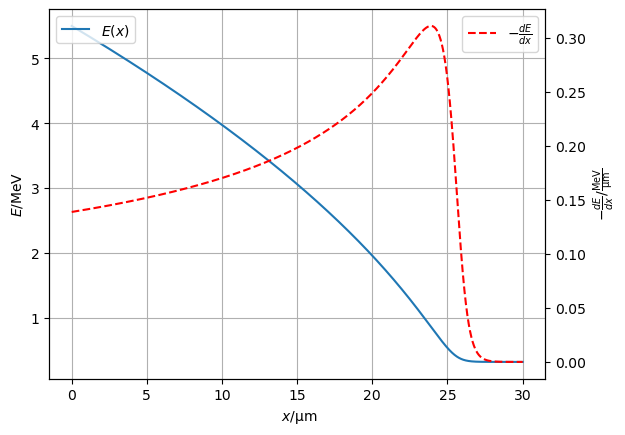

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cnts

# Define variables
atomic_number_1 = 2
atomic_number_2 = 14
density_2 = 2329
atomic_mass_2 = 28
electron_density = atomic_number_2 * density_2 / (atomic_mass_2 * cnts.u)

alpha_mass, _, _ = cnts.physical_constants['alpha particle mass']
binding_energy = 173.0

# Define constants
C = (atomic_number_1 ** 2 * cnts.e ** 4 * electron_density) / (4.0 * cnts.pi * cnts.epsilon_0 ** 2 * cnts.m_e)

# Define functions
def beta(v):
    return v / cnts.c

def v(E_kin):
    return cnts.c * np.sqrt(1.0 - 1.0 / ((E_kin / (alpha_mass * cnts.c ** 2) + 1.0) ** 2))

def dEdx(E_kin):
    v_temp = v(E_kin)
    return C * 1 / (v_temp ** 2) * (np.log(2 * cnts.m_e * v_temp ** 2 / (cnts.e * binding_energy)) - np.log(1 - beta(v_temp) ** 2) - beta(v_temp) ** 2)

# Define simulation parameters
dx = 1e-9
N = 30000

# Initialize arrays
Ekins = np.zeros(N)
Ekins[0] = cnts.e * 5.5e6
dEdxs = np.zeros(N)
dEs = np.zeros(N)
xs = np.zeros(N)

# Simulate energy loss
for i in range(N - 1):
    dEdxs[i] = dEdx(Ekins[i])
    dEs[i] = dEdxs[i] * dx
    Ekins[i + 1] = Ekins[i] - dEs[i]
    xs[i + 1] = xs[i] + dx

# Convert units
Ekins = Ekins / cnts.e * 1e-6
dEdxs = dEdxs / cnts.e * 1e-12
dEs = dEs / cnts.e * 1e-6


fig, ax1 = plt.subplots()
ax1.grid()
ax1.plot(xs * 1e6, Ekins, label="$E(x)$")
ax1.set_xlabel(r" $x /  \mathrm{\mu m}$")
ax1.set_ylabel(r"$E / \mathrm{MeV}$")



ax2 = ax1.twinx()
ax2.plot(xs * 1e6, dEdxs, 'r--', label=r"$-\frac{dE}{dx}$")


ax2.set_ylabel(r"$-\frac{dE}{dx} / \frac{\mathrm{MeV}}{\mathrm{\mu m}}$")
ax2.legend(loc=0)
ax1.legend(loc=2)

fig.savefig('out/bethe_energy_loss.png')